In [34]:
import mysql.connector
import pandas as pd

In [35]:
# Connect to MySQL
connection = mysql.connector.connect(
    host="localhost",       # Replace with your host (e.g., "127.0.0.1")
    user="root",   # Your MySQL username
    password="aachal123", # Your MySQL password
    database="Walmart_data" # Optional: specify database to connect to
)

# Check connection
if connection.is_connected():
    print("Connected to MySQL!")

Connected to MySQL!


In [36]:
#create cursor object to execute sql queries
cursor = connection.cursor()

In [37]:
# Query the data from walmart data sale
cursor.execute("SELECT * FROM walmart_sales_data")


In [38]:
#After fetching data from the database we are storing it into Pandas DataFrame
walmart_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [39]:
#printing first 5 records from table
print(walmart_data.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  \
0       Health and beauty       74.69         7  26.1415  548.9715   
1  Electronic accessories       15.28         5   3.8200   80.2200   
2      Home and lifestyle       46.33         7  16.2155  340.5255   
3       Health and beauty       58.22         8  23.2880  489.0480   
4       Sports and travel       86.31         7  30.2085  634.3785   

         Date      Time      Payment    cogs  gross margin percentage  \
0  05-01-2019  13:08:00      Ewallet  522.83                 4.761905   
1  08-03-2019  10:29:00         Cash   76.40                 4.761905   
2  03-03-20

In [40]:
# print last 5 records from the data
print(walmart_data.tail())

      Invoice ID Branch       City Customer type  Gender         Product line  \
995  233-67-5758      C  Naypyitaw        Normal    Male    Health and beauty   
996  303-96-2227      B   Mandalay        Normal  Female   Home and lifestyle   
997  727-02-1313      A     Yangon        Member    Male   Food and beverages   
998  347-56-2442      A     Yangon        Normal    Male   Home and lifestyle   
999  849-09-3807      A     Yangon        Member  Female  Fashion accessories   

     Unit price  Quantity   Tax 5%      Total        Date      Time  Payment  \
995       40.35         1   2.0175    42.3675  29-01-2019  13:46:00  Ewallet   
996       97.38        10  48.6900  1022.4900  02-03-2019  17:16:00  Ewallet   
997       31.84         1   1.5920    33.4320  09-02-2019  13:22:00     Cash   
998       65.82         1   3.2910    69.1110  22-02-2019  15:33:00     Cash   
999       88.34         7  30.9190   649.2990  18-02-2019  13:28:00     Cash   

       cogs  gross margin percen

In [41]:
# print the information and data type of the dataset
print(walmart_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [42]:
#print the size of the data
print(walmart_data.shape)

(1000, 17)


# Exploratory Data Analysis

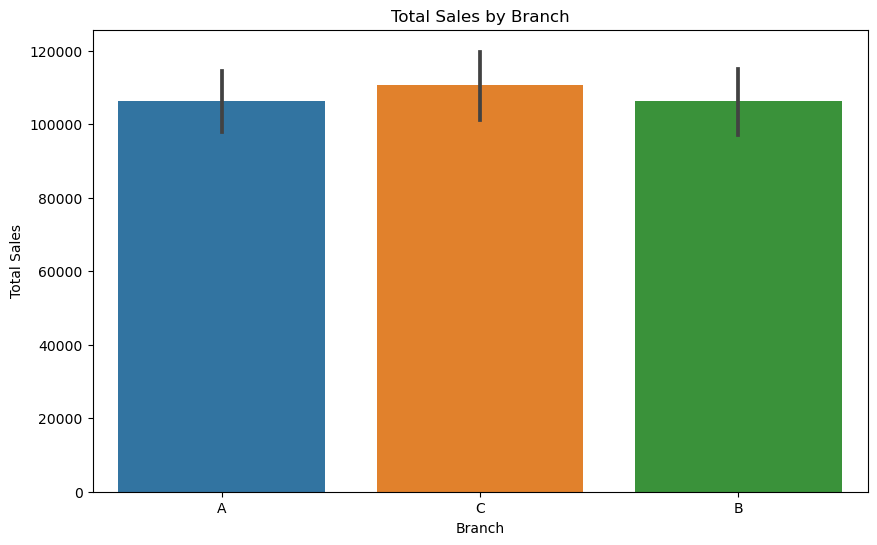

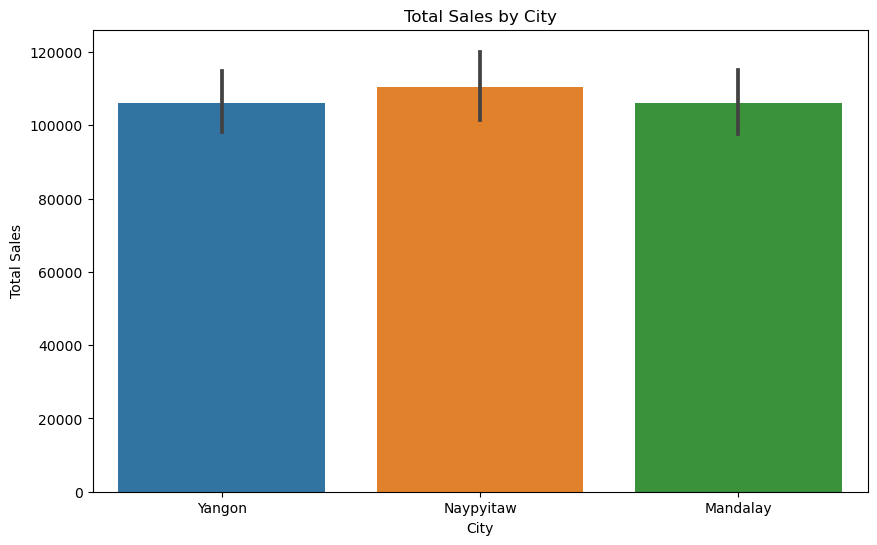

In [54]:
# What are the total sales (sum of "Total") for each branch or city?
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 6))
sns.barplot(x='Branch', y='Total', data=walmart_data, estimator=sum)
plt.title('Total Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Total', data=walmart_data, estimator=sum)
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()

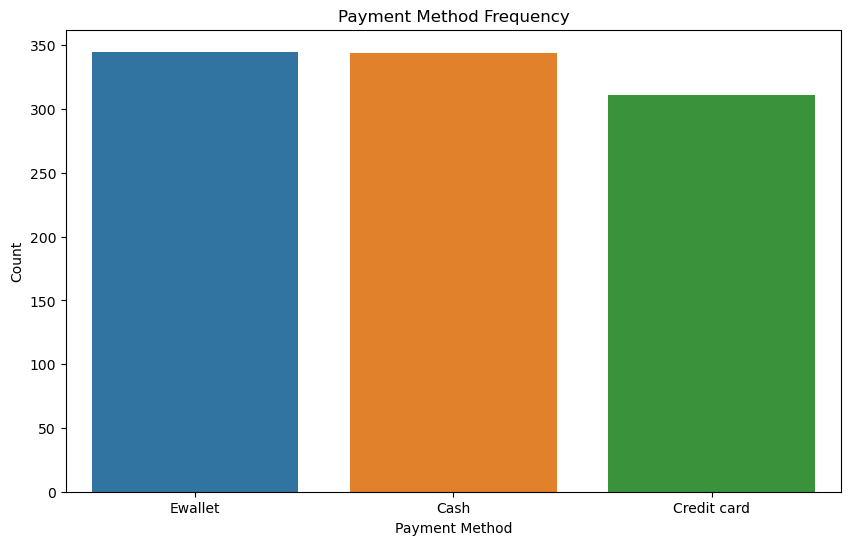

In [55]:
# What are the payment methods used most frequently?
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment', data=walmart_data)
plt.title('Payment Method Frequency')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

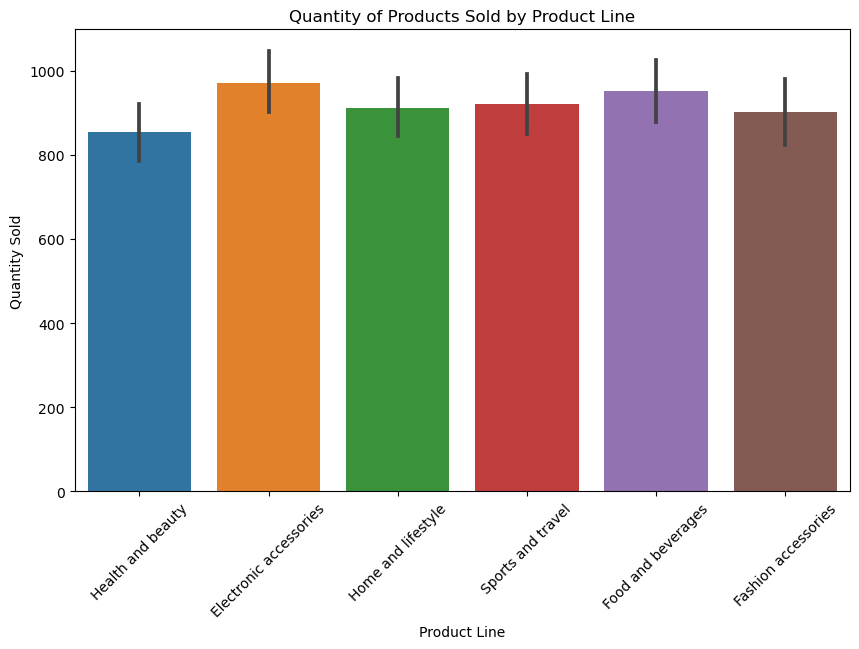

In [43]:
# How does the quantity of products sold vary by product line?
plt.figure(figsize=(10, 6))
sns.barplot(x='Product line', y='Quantity', data=walmart_data, estimator=sum)
plt.title('Quantity of Products Sold by Product Line')
plt.xticks(rotation=45)
plt.xlabel('Product Line')
plt.ylabel('Quantity Sold')
plt.show()

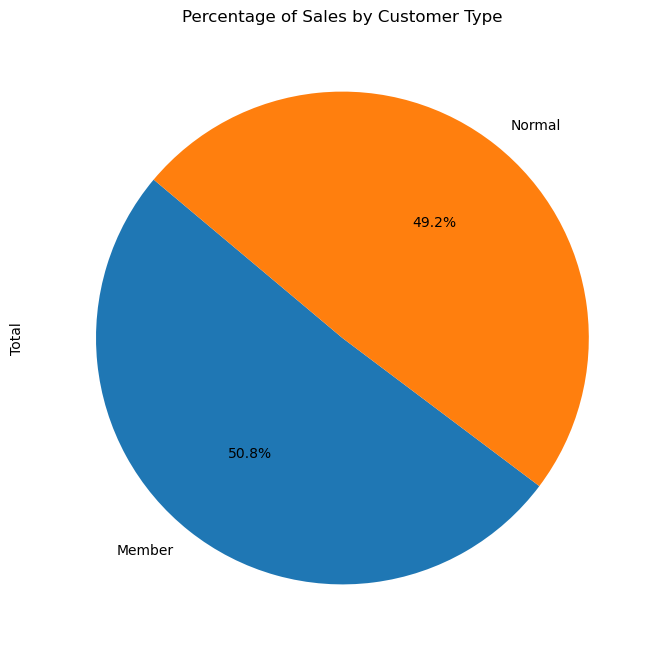

In [69]:
# What is the percentage distribution of sales by customer type (Member vs. Normal)?
customer_sales = walmart_data.groupby('Customer type')['Total'].sum()
plt.figure(figsize=(8, 8))
customer_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, labels=customer_sales.index)
plt.title('Percentage of Sales by Customer Type')
plt.show()

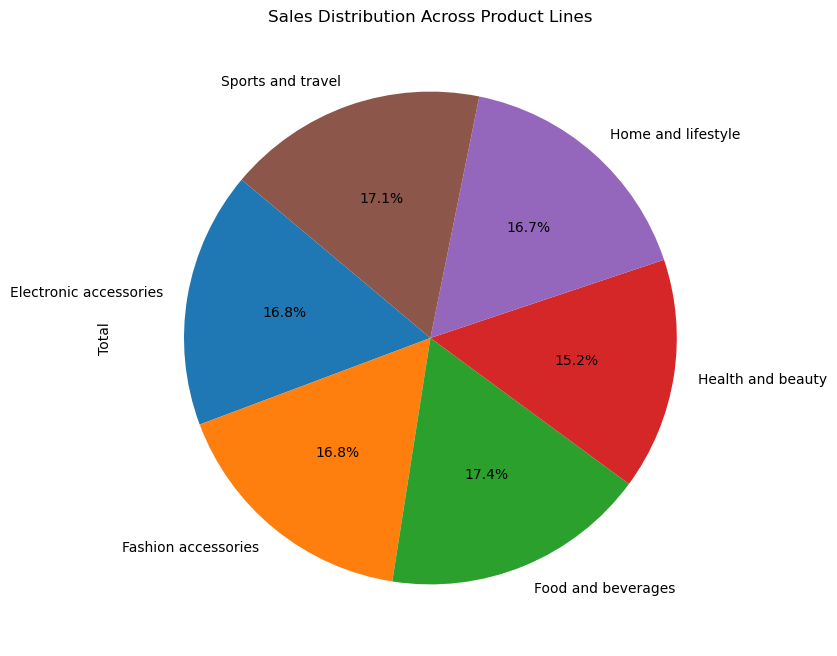

In [68]:
# How are sales distributed across different product lines?
product_sales = walmart_data.groupby('Product line')['Total'].sum()
plt.figure(figsize=(8, 8))
product_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, labels=product_sales.index)
plt.title('Sales Distribution Across Product Lines')
plt.show()

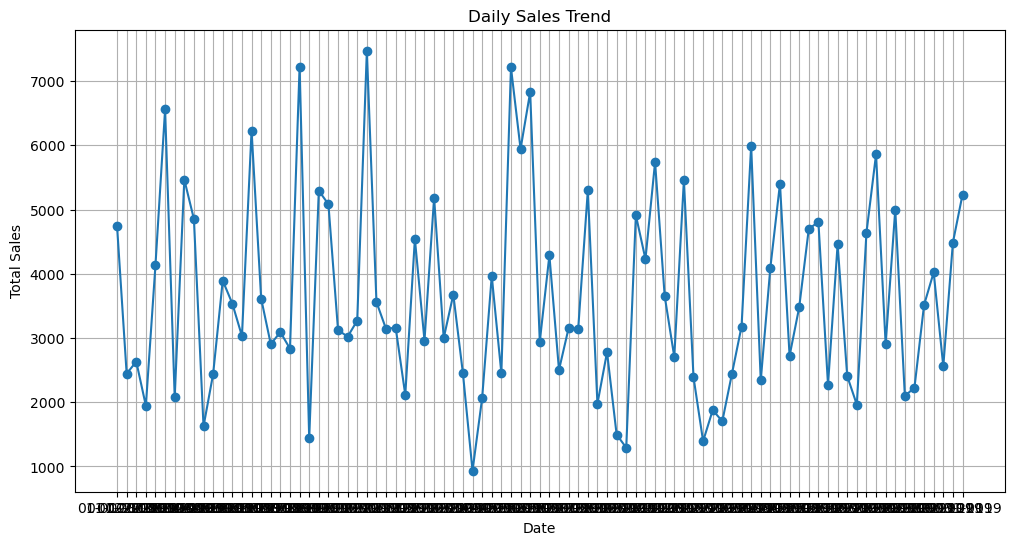

In [59]:
# How do daily or monthly sales vary over time?
daily_sales = walmart_data.groupby('Date')['Total'].sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, marker='o')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

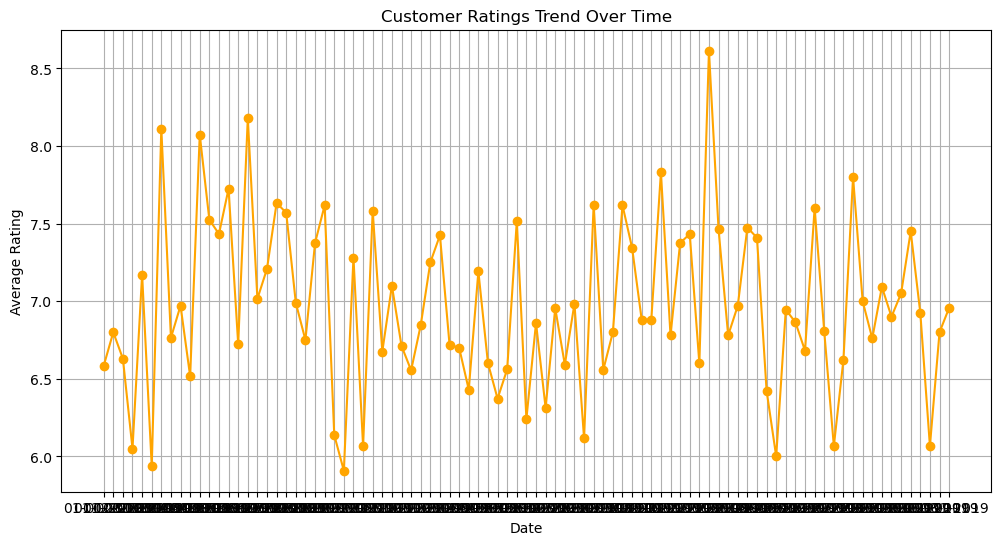

In [60]:
# What is the trend in customer ratings over time?
daily_ratings = walmart_data.groupby('Date')['Rating'].mean()
plt.figure(figsize=(12, 6))
plt.plot(daily_ratings, marker='o', color='orange')
plt.title('Customer Ratings Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.grid()
plt.show()

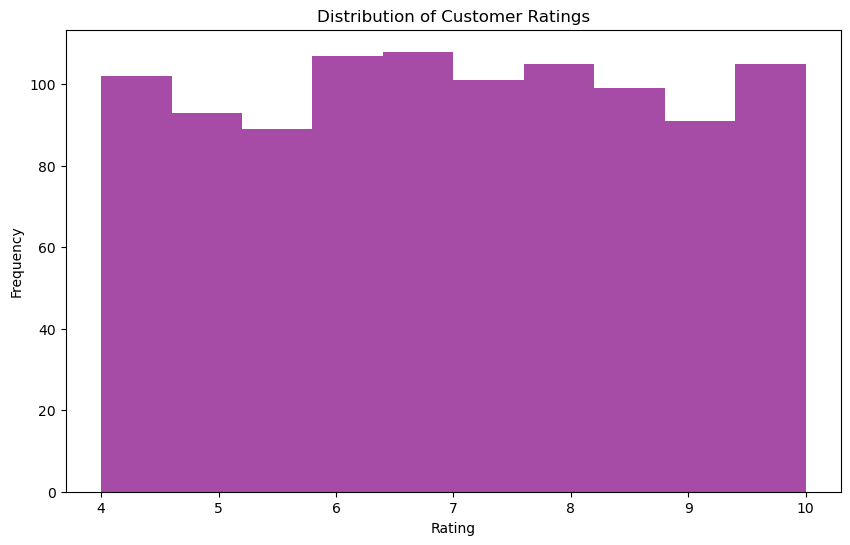

In [61]:
# What is the distribution of customer ratings?
plt.figure(figsize=(10, 6))
plt.hist(walmart_data['Rating'], bins=10, color='purple', alpha=0.7)
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

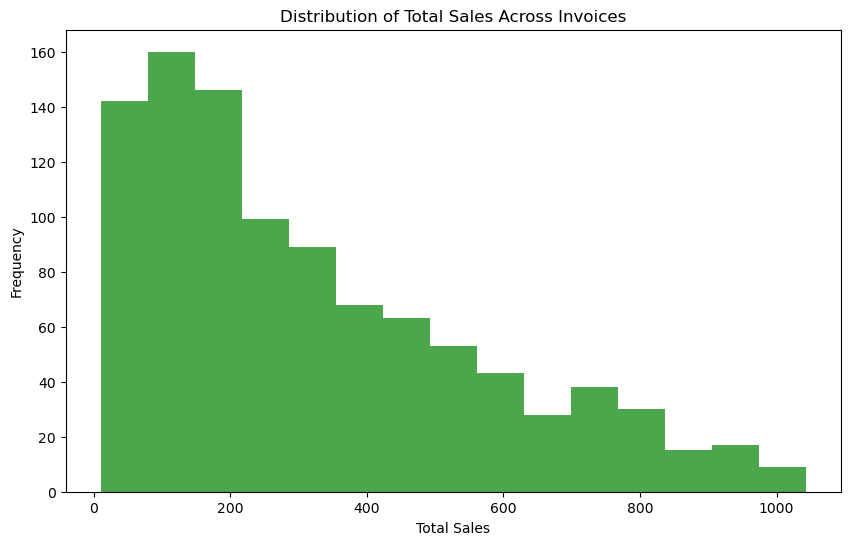

In [62]:
# What is the distribution of total sales across invoices?

plt.figure(figsize=(10, 6))
plt.hist(walmart_data['Total'], bins=15, color='green', alpha=0.7)
plt.title('Distribution of Total Sales Across Invoices')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

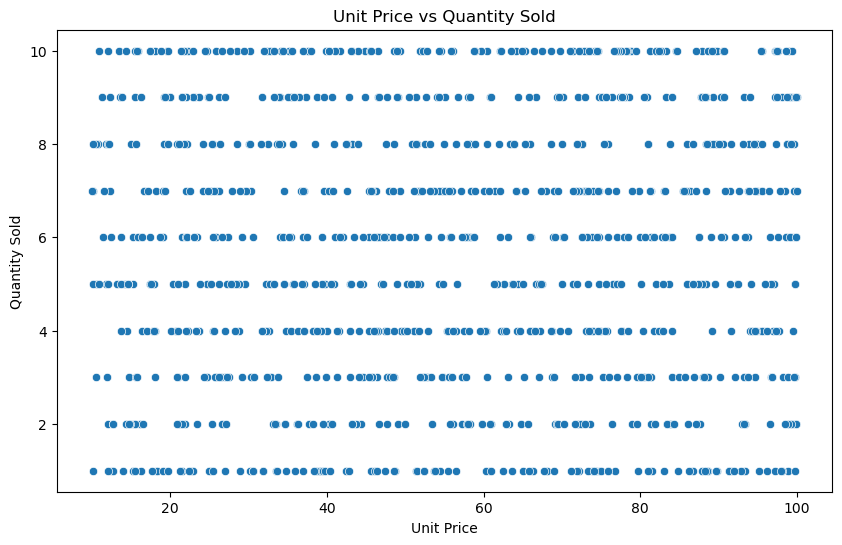

In [63]:
# Is there a relationship between unit price and quantity sold?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unit price', y='Quantity', data=walmart_data)
plt.title('Unit Price vs Quantity Sold')
plt.xlabel('Unit Price')
plt.ylabel('Quantity Sold')
plt.show()

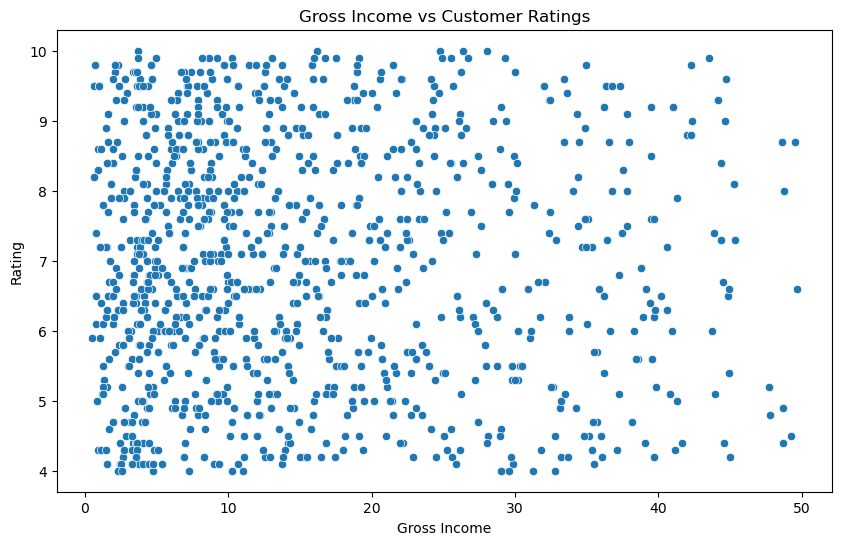

In [64]:
# How does gross income correlate with customer ratings?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gross income', y='Rating', data=walmart_data)
plt.title('Gross Income vs Customer Ratings')
plt.xlabel('Gross Income')
plt.ylabel('Rating')
plt.show()

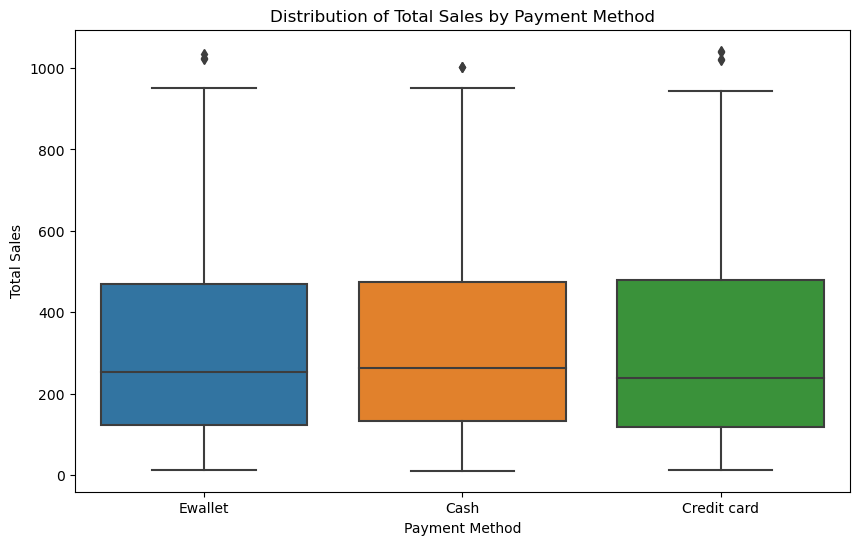

In [65]:
# What is the range and distribution of total sales for different payment methods?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Payment', y='Total', data=walmart_data)
plt.title('Distribution of Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.show()

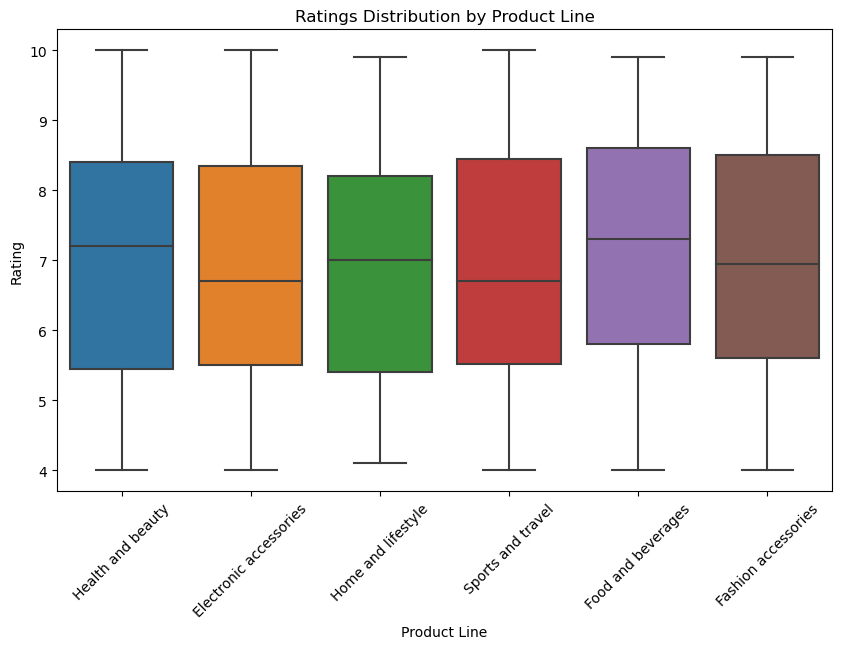

In [66]:
# How does the rating distribution differ across product lines?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product line', y='Rating', data=walmart_data)
plt.title('Ratings Distribution by Product Line')
plt.xticks(rotation=45)
plt.xlabel('Product Line')
plt.ylabel('Rating')
plt.show()

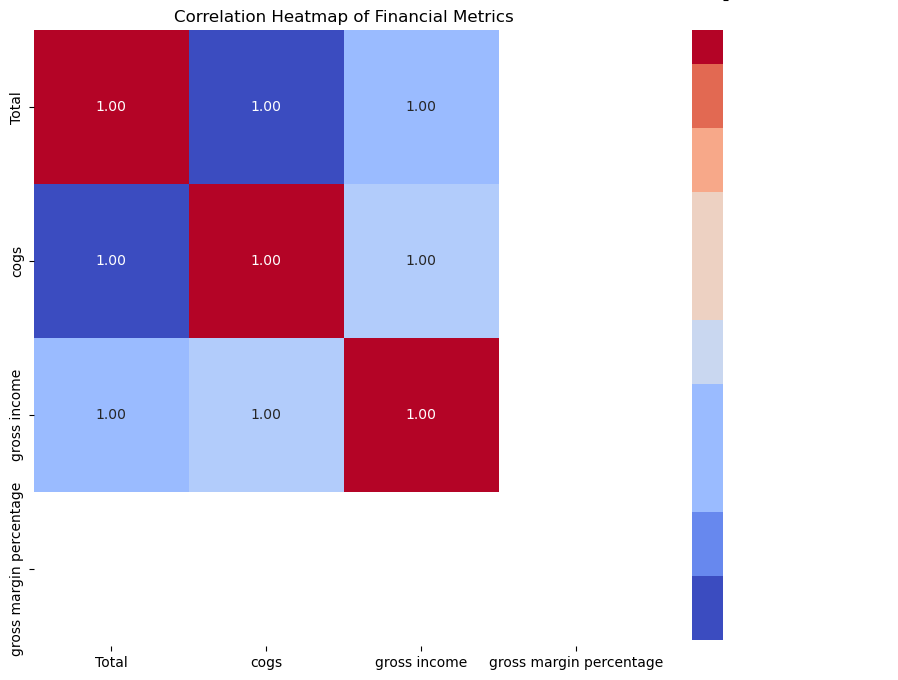

In [67]:
# What is the correlation between financial metrics like gross income, COGS, and total sales?
plt.figure(figsize=(10, 8))
correlation = walmart_data[['Total', 'cogs', 'gross income', 'gross margin percentage']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Financial Metrics')
plt.show()

Conclusion: This project successfully demonstrates the use of DBMS and Python visualization tools to extract valuable insights from Walmart sales data. 
The analysis reveals critical patterns in customer behaviour, product preferences, and branch performance, offering actionable recommendations for business optimization. 
By leveraging structured data management and visualization, this project emphasizes the importance of data analytics in retail decision-making.